# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [24]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
ahir,comedy ahir shah ends transcript septemberfrom...,Ahir Shah
alex,comedy alex edelman just for us transcript apr...,Dave Chappelle
ali,comedy ali wong baby cobra transcript septembe...,Ricky Gervais
anthony,comedy anthony jeselnik thoughts and prayers– ...,Bo Burnham
bill,comedy bill burr im sorry you feel that way– f...,Bill Burr
bo,this page doesnt seem to exist it looks like t...,Jim Gaffigan
dave,comedy dave chappelle the age of spin– transcr...,John Mulaney
george,comedy george carlin im glad im dead transcrip...,Ali Wong
hasan,comedy hasan minhaj off with his head transcri...,Anthony Jeselnik
jacqueline,comedy jacqueline novak get on your knees tran...,Mike Birbiglia


In [25]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data.head(5)

,transcript,full_name,polarity,subjectivity
ahir,comedy ahir shah ends transcript septemberfrom...,Ahir Shah,0.144148,0.492570
alex,comedy alex edelman just for us transcript apr...,Dave Chappelle,0.097336,0.448451
ali,comedy ali wong baby cobra transcript septembe...,Ricky Gervais,0.068186,0.480509
anthony,comedy anthony jeselnik thoughts and prayers– ...,Bo Burnham,0.051333,0.559555
bill,comedy bill burr im sorry you feel that way– f...,Bill Burr,0.009567,0.545523


C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\4109199641.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)


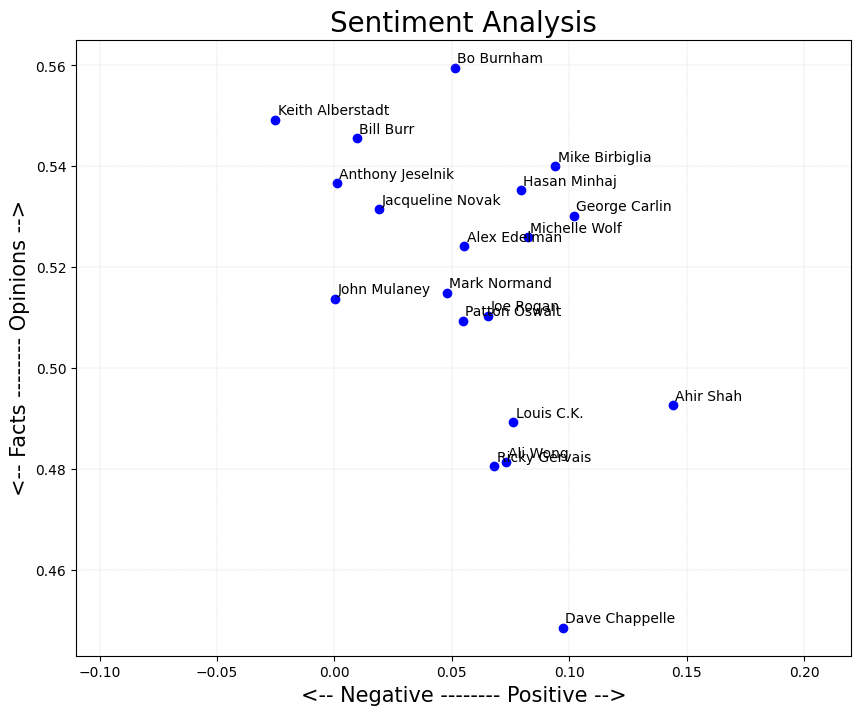

In [26]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    if comedian == "jim" or (data.polarity.loc[comedian] == 0 and data.subjectivity.loc[comedian] == 0):
      continue
    else:
        x = data.polarity.loc[comedian]
        y = data.subjectivity.loc[comedian]
        plt.scatter(x, y, color='blue')
        plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
        plt.xlim(-.11, .22) 
    
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.2, alpha=0.9)

plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [27]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [28]:
# Let's take a look at our data again
data.head(5)

,transcript,full_name,polarity,subjectivity
ahir,comedy ahir shah ends transcript septemberfrom...,Ahir Shah,0.144148,0.492570
alex,comedy alex edelman just for us transcript apr...,Dave Chappelle,0.097336,0.448451
ali,comedy ali wong baby cobra transcript septembe...,Ricky Gervais,0.068186,0.480509
anthony,comedy anthony jeselnik thoughts and prayers– ...,Bo Burnham,0.051333,0.559555
bill,comedy bill burr im sorry you feel that way– f...,Bill Burr,0.009567,0.545523


In [29]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['comedy ahir shah ends transcript septemberfrom londons royal court theatre acclaimed comedian ahir shah dishes on class family and multiculturalism in the uk from his grandfathers viewahir shah ends genre standup comedy social commentarydirector peter ortonwriter ahir shahstar ahir shahin this standup comedy special ahir shah takes the audience on a personal and cultural journey reflecting on his british indian heritage and family history from childhood memories of watching goodness gracious me with his grandparents to dealing with societal changes class and multiculturalism in the uk shah blends humor and poignant storytelling the show covers themes of identity family sacrifice love and the generational impact of immigration all while maintaining his trademark wit and insightful social commentary in januarya sevenyearold boy was sat on the floor of his grandparents living room in alperton north west london three generations gathered round the telly to watch episode one of this new 

In [30]:
# The list has 10 elements, one for each transcript
len(list_pieces)

21

In [31]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [32]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.1547289218717791,
  0.12938156678391058,
  0.06625409373235458,
  0.14995763577621987,
  0.12782602813852817,
  0.17524806052033776,
  0.15094618869103407,
  0.09045363408521301,
  0.1738189565443663,
  0.22815841998084999],
 [0.07071667881073822,
  0.07323475987949674,
  0.11453959720088754,
  0.09517601977967834,
  0.16709176625843283,
  0.10754708741550847,
  0.03313017818635798,
  0.10046384479717811,
  0.08888291486291487,
  0.10915366721401204],
 [0.11883684621389543,
  0.05475584215167549,
  0.07383200893474866,
  0.0968764172335601,
  -0.044225181598062956,
  0.13886552882454523,
  0.039082584082584075,
  0.09664318108195656,
  0.026588624338624342,
  0.08291040100250621],
 [0.12640404899333474,
  -0.05308441558441559,
  -0.018946837994457046,
  0.03573691460055097,
  0.0648085408954974,
  0.13177059712773997,
  0.09172619047619048,
  -0.08365793650793651,
  0.045669277812134965,
  0.15146538132649237],
 [-0.026168791525934383,
  -0.015492456452277878,
  0.02363182746846113

C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\3617250271.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][0])  # Ensure it matches the correct comedian


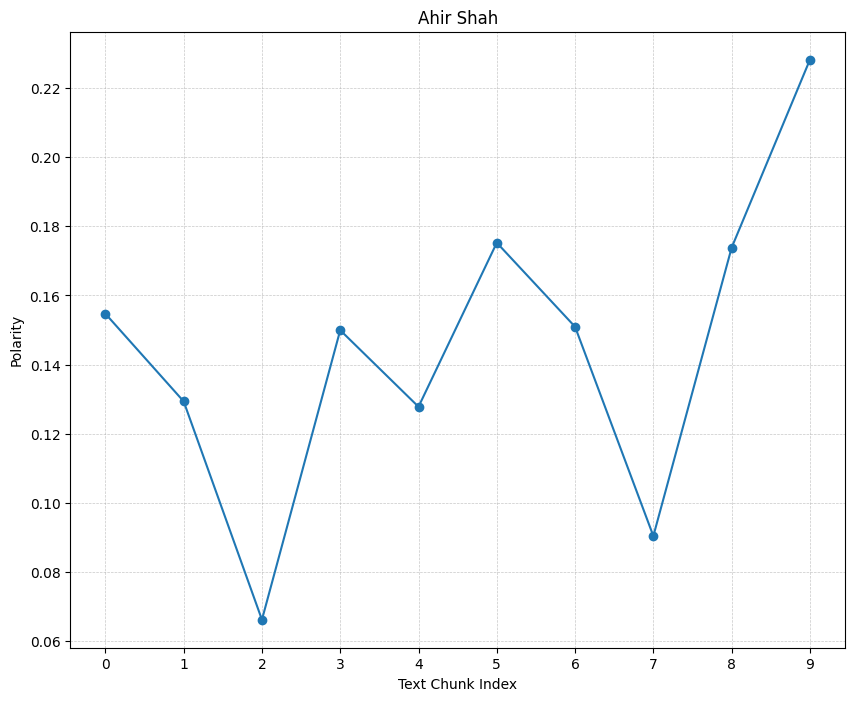

In [33]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0], marker='o', label='Polarity')

# Add a grid to the plot
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Change the x-axis to integer indexes
plt.xticks(ticks=range(len(polarity_transcript[1])), labels=range(len(polarity_transcript[1])))

# Add title and labels
plt.title(data['full_name'][0])  # Ensure it matches the correct comedian
plt.xlabel('Text Chunk Index')
plt.ylabel('Polarity')

# Show the plot
plt.show()


C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\1011260337.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index], fontsize=10)
C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\1011260337.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index], fontsize=10)
C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\1011260337.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

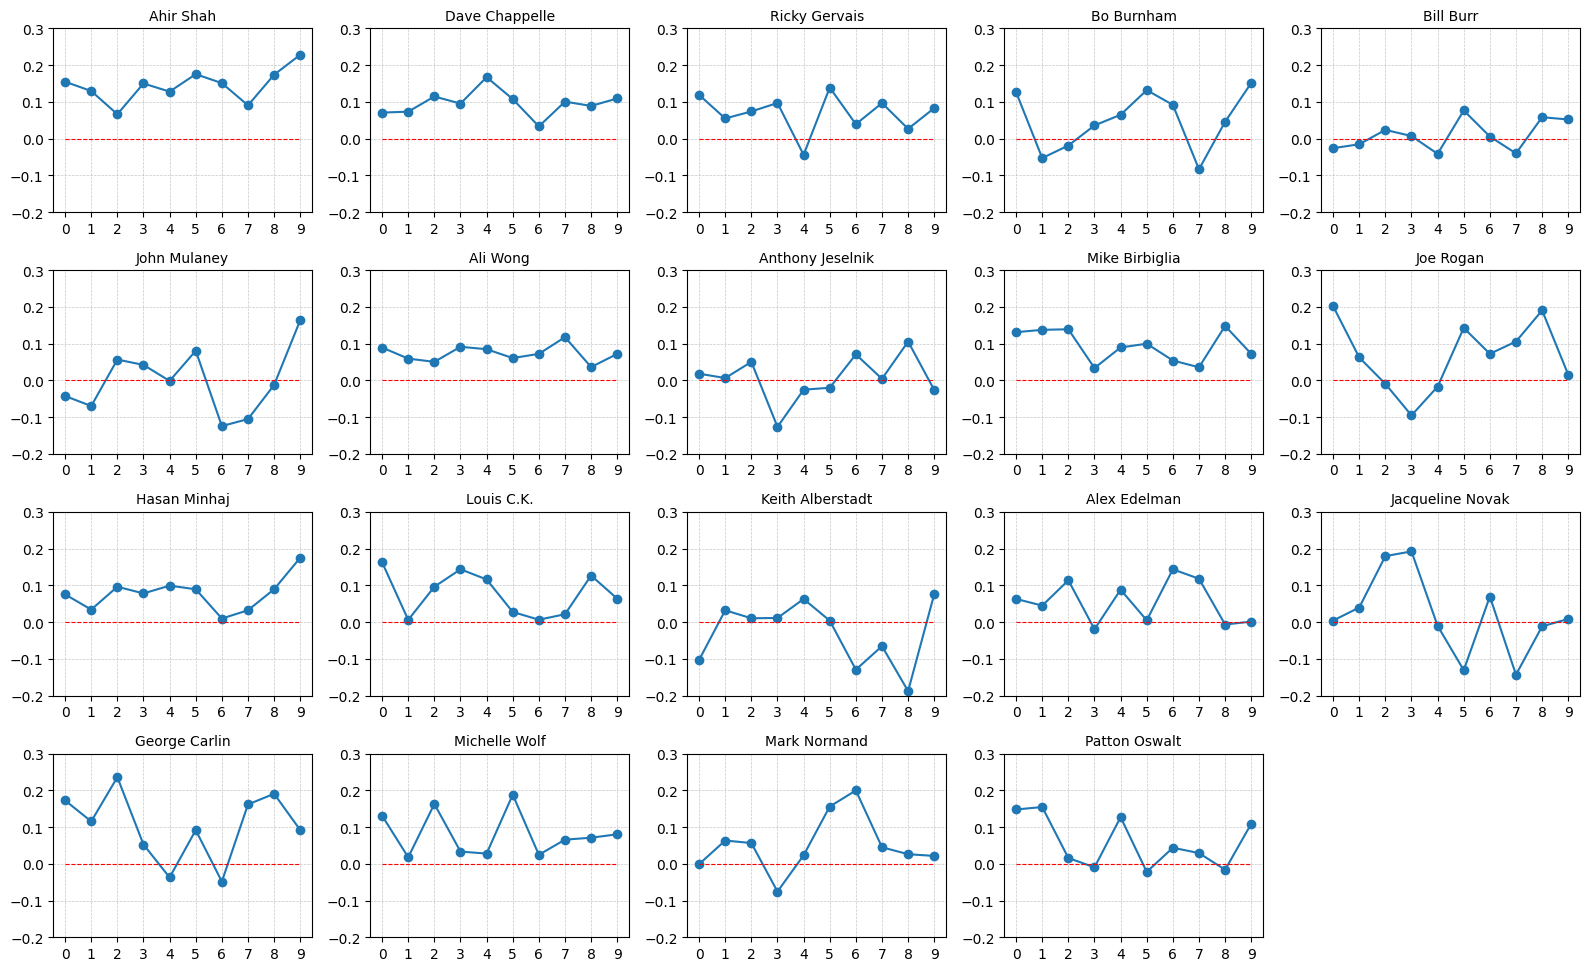

In [34]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

current_plot = 1  # Track the current subplot position

for index, comedian in enumerate(data.index):
    # Skip invalid or empty data
    if comedian == "jim" or (data.polarity.loc[comedian] == 0 and data.subjectivity.loc[comedian] == 0):
        continue
    else:
        # Create subplot at the current position
        plt.subplot(5, 5, current_plot)  # Arrange plots in a 5x5 grid
        current_plot += 1  # Increment position for the next plot

        # Get the number of parts for the current comedian
        num_chunks = len(polarity_transcript[index])

        # Plot polarity with markers
        plt.plot(polarity_transcript[index], marker='o', label='Polarity')

        # Add grid to each subplot
        plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

        # Add a neutral reference line
        plt.plot(np.arange(0, num_chunks), np.zeros(num_chunks), color='red', linestyle='--', linewidth=0.8, label='Neutral Line')

        # Adjust x-axis to integer ticks based on the number of chunks
        plt.xticks(ticks=range(num_chunks), labels=range(num_chunks))

        # Add title and adjust y-axis limits
        plt.title(data['full_name'][index], fontsize=10)
        plt.ylim(ymin=-0.2, ymax=0.3)  # Uniform y-axis for comparison

# Adjust layout
plt.tight_layout()  # Ensure subplots don’t overlap
plt.show()


Ali Wong stays generally positive throughout her routine. Similar comedians are Louis C.K. and Mike Birbiglia.

On the other hand, you have some pretty different patterns here like Bo Burnham who gets happier as time passes and Dave Chappelle who has some pretty down moments in his routine.

## Additional Exercises

1. Modify the number of sections the comedy routine is split into and see how the charts over time change.



Use n = 10 to focus on the broader flow of the routine (positive, negative, or neutral shifts).
For Moderate Detail:

Use n = 20 if you want to strike a balance between overall trends and local sentiment changes.
For Fine-Grained Analysis:

Use n = 50 to zoom in on micro-level sentiment shifts (e.g., individual jokes or small transitions).

# No of chunks = 20

In [35]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=20):
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [36]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['comedy ahir shah ends transcript septemberfrom londons royal court theatre acclaimed comedian ahir shah dishes on class family and multiculturalism in the uk from his grandfathers viewahir shah ends genre standup comedy social commentarydirector peter ortonwriter ahir shahstar ahir shahin this standup comedy special ahir shah takes the audience on a personal and cultural journey reflecting on his british indian heritage and family history from childhood memories of watching goodness gracious me with his grandparents to dealing with societal changes class and multiculturalism in the uk shah blends humor and poignant storytelling the show covers themes of identity family sacrifice love and the generational impact of immigration all while maintaining his trademark wit and insightful social commentary in januarya sevenyearold boy was sat on the floor of his grandparents living room in alperton north west london three generations gathered round the telly to watch episode one of this new 

In [37]:
len(list_pieces)

21

In [38]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

20

In [39]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.2117037975574561,
  0.10800952380952376,
  0.08730158730158731,
  0.17016677766677765,
  0.12142141756548533,
  0.008131377551020407,
  0.05321382657746294,
  0.24169745484400662,
  0.1577619047619048,
  0.08843671679197992,
  0.19847751322751328,
  0.14125373948544684,
  0.15707972582972585,
  0.14414596273291921,
  0.12173809523809523,
  0.062297619047619046,
  0.10372250069618491,
  0.2352881562881563,
  0.15628658553186853,
  0.2986992945326279],
 [0.04427100677100677,
  0.09878147362841241,
  0.1579949338101512,
  0.01589699516170104,
  0.12241140642303434,
  0.10776984126984125,
  0.11323986619441168,
  0.07425998708893447,
  0.1951914098972922,
  0.14537840526476897,
  0.08784271284271288,
  0.12384108946608946,
  0.007130447330447345,
  0.06646316646316647,
  0.12358401084010838,
  0.08111839974084871,
  0.09829823660332138,
  0.0804661878525515,
  0.07080224867724864,
  0.15024447278911562],
 [0.17690476190476193,
  0.05476190476190475,
  0.07504836309523812,
  0.038521825

C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\1011260337.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index], fontsize=10)
C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\1011260337.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['full_name'][index], fontsize=10)
C:\Users\CGDXK\AppData\Local\Temp\ipykernel_16108\1011260337.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

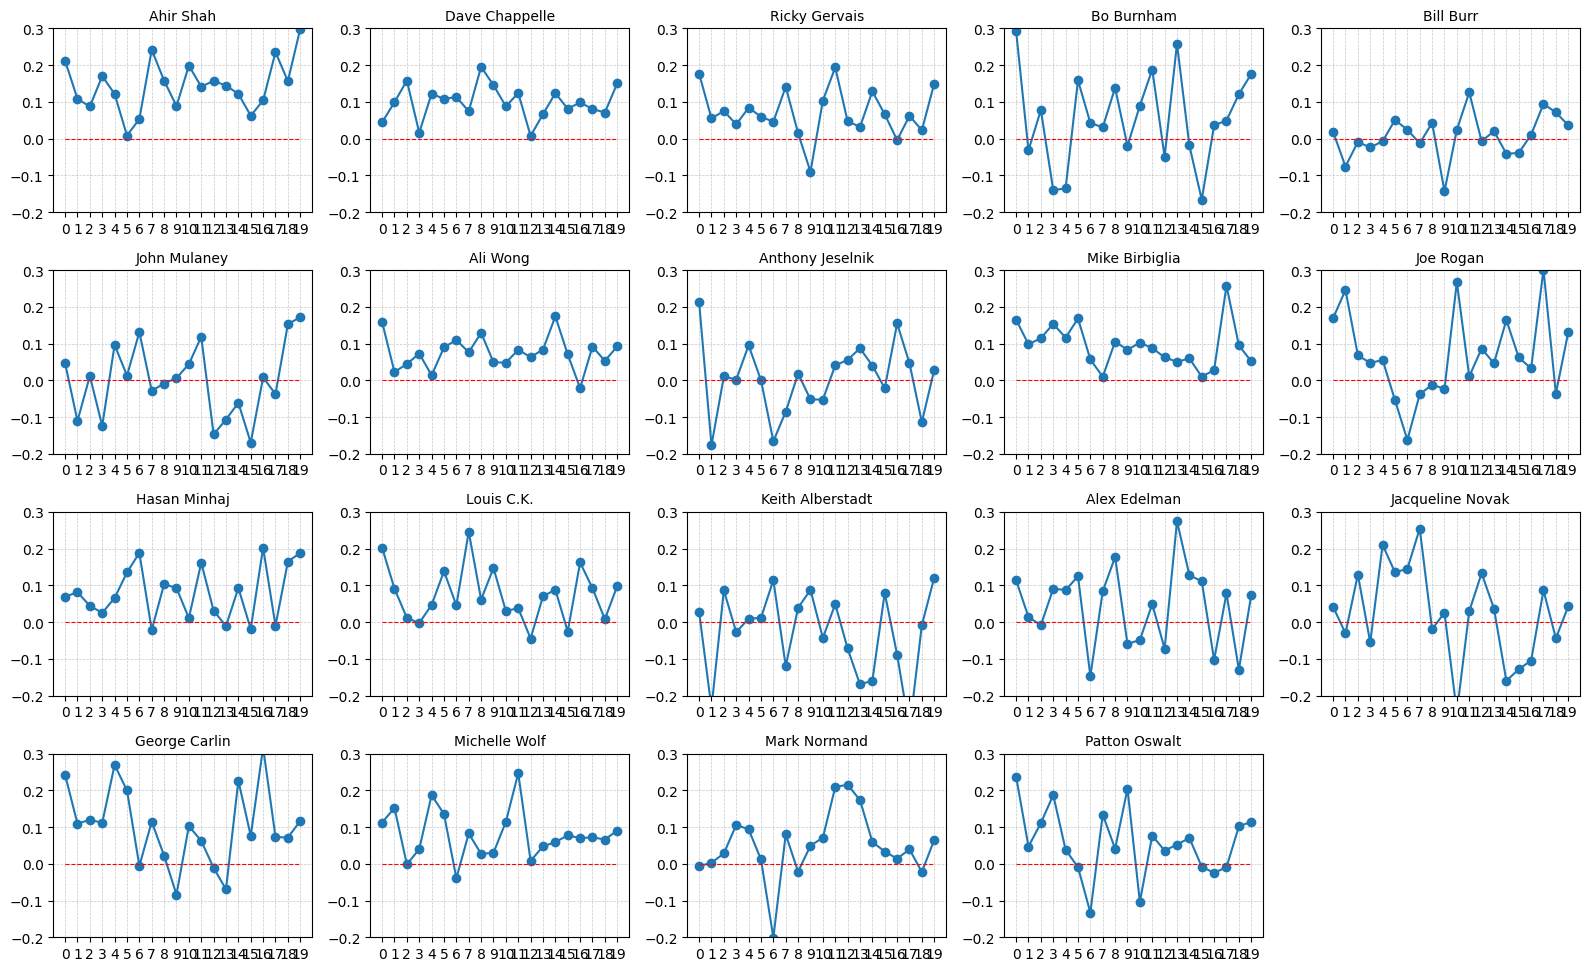

In [40]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

current_plot = 1  # Track the current subplot position

for index, comedian in enumerate(data.index):
    # Skip invalid or empty data
    if comedian == "jim" or (data.polarity.loc[comedian] == 0 and data.subjectivity.loc[comedian] == 0):
        continue
    else:
        # Create subplot at the current position
        plt.subplot(5, 5, current_plot)  # Arrange plots in a 5x5 grid
        current_plot += 1  # Increment position for the next plot

        # Get the number of parts for the current comedian
        num_chunks = len(polarity_transcript[index])

        # Plot polarity with markers
        plt.plot(polarity_transcript[index], marker='o', label='Polarity')

        # Add grid to each subplot
        plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

        # Add a neutral reference line
        plt.plot(np.arange(0, num_chunks), np.zeros(num_chunks), color='red', linestyle='--', linewidth=0.8, label='Neutral Line')

        # Adjust x-axis to integer ticks based on the number of chunks
        plt.xticks(ticks=range(num_chunks), labels=range(num_chunks))

        # Add title and adjust y-axis limits
        plt.title(data['full_name'][index], fontsize=10)
        plt.ylim(ymin=-0.2, ymax=0.3)  # Uniform y-axis for comparison

# Adjust layout
plt.tight_layout()  # Ensure subplots don’t overlap
plt.show()
